# Módulo 2 — Métricas estadísticas

## 2.1 Correlación
El coeficiente de correlación mide hasta qué punto la relación entre dos variables es lineal.  
Su valor siempre está entre $-1$ y $1$.  

- Un coeficiente positivo indica que las variables están directamente relacionadas, es decir, cuando una aumenta la otra también aumenta.  
- Un coeficiente negativo indica que las variables están inversamente relacionadas, de modo que cuando una aumenta la otra disminuye.  
- Cuanto más cercano a $0$ esté el coeficiente de correlación, más débil será la relación entre las variables.  

El coeficiente de correlación de dos series $X$ e $Y$ se define como:

$$
\rho_{X,Y} = \frac{\operatorname{Cov}(X,Y)}{\sigma_X \, \sigma_Y}
$$

donde $\operatorname{Cov}(X,Y)$ es la covarianza y $\sigma_X, \sigma_Y$ son las desviaciones estándar.  

Dos conjuntos aleatorios de datos tendrán un coeficiente de correlación cercano a $0$.


### Correlación vs. Covarianza

La correlación es simplemente una forma normalizada de la covarianza.  
Por lo demás, son lo mismo y a menudo se utilizan de manera casi intercambiable en conversaciones cotidianas.  
Es importante ser preciso con el lenguaje al hablar de ambas, pero conceptualmente son casi idénticas.  

### La covarianza no es tan significativa por sí sola

Supongamos que tenemos dos variables $X$ e $Y$ y calculamos la covarianza entre ellas.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

In [ ]:
X = np.random.rand(50)
Y = 2 * X + 4

print ('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print ('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

### ¿Por qué tanto `np.cov` como `np.corrcoef` devuelven matrices?

La **matriz de covarianza** es un concepto importante en estadística.  
A menudo la gente se refiere a la covarianza de dos variables $X$ e $Y$, pero en realidad eso es solo una entrada dentro de la matriz de covarianza de $X$ e $Y$.  

- Para cada variable de entrada tenemos una fila y una columna.  
- La diagonal corresponde a la varianza de esa variable, es decir, $\sigma^2$.  
- Las entradas fuera de la diagonal son las covarianzas entre diferentes variables.  
- La matriz es simétrica con respecto a la diagonal.  

Vamos a comprobar que esto es cierto.


In [ ]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1
error = cov_matrix[0, 0] - X.var(ddof=1)

print ('error: ' + str(error))

In [ ]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print ('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
# Let's also use the builtin correlation function
print ('Built-in Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Veamos ahora cómo son dos variables positivamente correladas:

In [ ]:

X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Podemos reducir esta correlación añadiendo ruido:

In [ ]:

X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Finalmente, observamos dos variables con correlación negativa:

Correlation: -0.9528762568321624


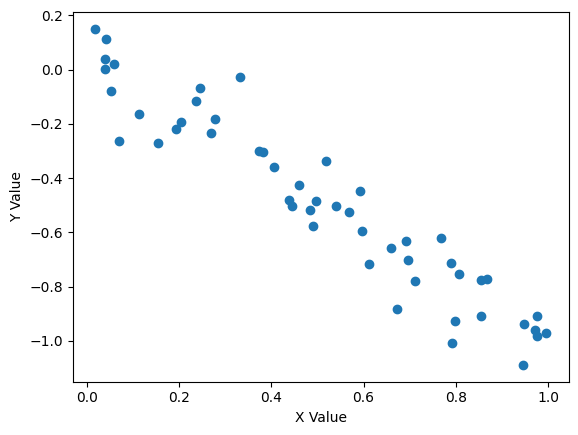

In [9]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

### ¿Cómo es esto útil en finanzas?

#### Determinar activos relacionados

Una vez que hemos establecido que dos series probablemente están relacionadas, podemos usar esa información para intentar predecir valores futuros de la serie.  

#### Construcción de un portafolio de activos no correlacionados

Otra razón por la que la correlación es útil en finanzas es que los activos no correlacionados producen los mejores portafolios.  
La intuición detrás de esto es que, si los activos no están correlacionados, una caída en uno no corresponderá con una caída en otro.  
Esto conduce a una corriente de retornos mucho más estable cuando se combinan muchos activos no correlacionados.  

---

### Limitaciones

#### Significancia

Es difícil determinar de manera rigurosa si una correlación es significativa, especialmente cuando, como en este caso, las variables no están distribuidas normalmente.  
Su coeficiente de correlación está cerca de $1$, por lo que es bastante seguro decir que los dos precios de las acciones están correlacionados en el período de tiempo que usamos.  
Pero, ¿es esto indicativo de una correlación futura?  

Un problema fundamental es que es fácil **sobreajustar correlaciones** escogiendo el período de tiempo adecuado.  
Para evitar esto, se debe calcular la correlación de dos variables en **muchos períodos históricos** y examinar la distribución del coeficiente de correlación.  

Más detalles sobre por qué las estimaciones de un único punto son poco fiables se cubrirán en futuros notebooks.  

---



Correlation coefficients
LRCX and AAPL:  0.9595011881844739
LRCX and SPY:  0.9390678167405037
AAPL and SPY:  0.9078499583673406


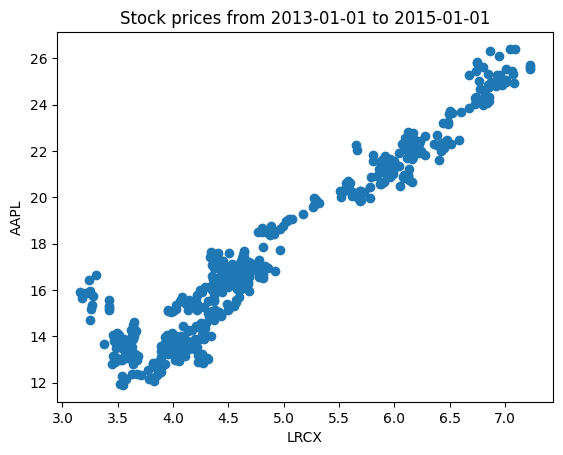

In [19]:
import yfinance as yf

start = '2013-01-01'
end = '2015-01-01'
aapl= yf.Ticker("aapl")
lrcx= yf.Ticker("lrcx")
bench=yf.Ticker("spy")

bench= bench.history(start=start, end=end, interval="1d")['Close']
a1= lrcx.history(start=start, end=end, interval="1d")['Close']
a2= aapl.history(start=start, end=end, interval="1d")['Close']

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print ("Correlation coefficients")
print ("LRCX and AAPL: ", np.corrcoef(a1,a2)[0,1])
print ("LRCX and SPY: ", np.corrcoef(a1,bench)[0,1])
print ("AAPL and SPY: ", np.corrcoef(bench,a2)[0,1])

Text(0, 0.5, '60-day Rolling Correlation')

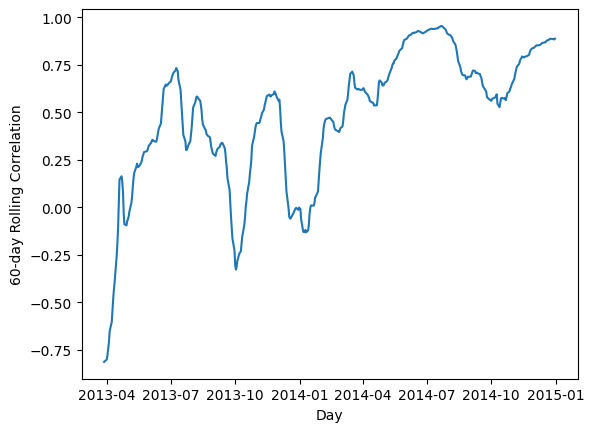

In [24]:
rolling_correlation = a1.rolling(window=60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

### Relaciones no lineales

El coeficiente de correlación puede ser útil para examinar la fuerza de la relación entre dos variables.  
Sin embargo, es importante recordar que dos variables pueden estar asociadas de diferentes maneras predecibles que este análisis no detectaría.  

- Por ejemplo, una variable podría seguir de manera precisa el comportamiento de otra, pero con un **desfase temporal**.  
  Existen técnicas para tratar con esta correlación retardada.  
- Alternativamente, una variable puede estar relacionada con la **tasa de cambio** de otra.  

Ninguna de estas relaciones es lineal, pero pueden ser muy útiles si se detectan.  

Además, el coeficiente de correlación puede ser muy sensible a los **valores atípicos** (*outliers*).  
Esto significa que incluir o excluir incluso un par de puntos de datos puede alterar el resultado, y no siempre está claro si estos puntos contienen información o son simplemente ruido.  





np.float64(0.2317292256781955)

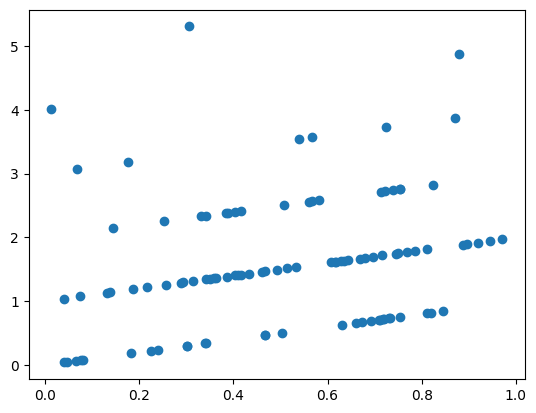

In [25]:
	
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]